In [52]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv(r"C:\Users\amal\Downloads\archive\train.csv")

In [3]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [11]:
data.duplicated().value_counts()

False    550068
dtype: int64

In [13]:
data.rename(columns=str.lower,inplace=True) 

In [14]:
data.columns


Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')

In [16]:
#processing each cplomn individually
data.user_id


0         1000001
1         1000001
2         1000001
3         1000001
4         1000002
           ...   
550063    1006033
550064    1006035
550065    1006036
550066    1006038
550067    1006039
Name: user_id, Length: 550068, dtype: int64

In [18]:
data.product_id


0         P00069042
1         P00248942
2         P00087842
3         P00085442
4         P00285442
            ...    
550063    P00372445
550064    P00375436
550065    P00375436
550066    P00375436
550067    P00371644
Name: product_id, Length: 550068, dtype: object

In [20]:
data.gender.unique()


array(['F', 'M'], dtype=object)

In [22]:
data.age.unique()


array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [24]:
data.occupation.unique(),len(data.occupation.unique()),data.occupation.dtype


(array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
         5, 14, 13,  6], dtype=int64),
 21,
 dtype('int64'))

In [26]:
data.city_category.unique()


array(['A', 'C', 'B'], dtype=object)

In [28]:
data.stay_in_current_city_years.unique()


array(['2', '4+', '3', '1', '0'], dtype=object)

In [30]:
data.stay_in_current_city_years=data.stay_in_current_city_years.replace("4+",'4').astype(int)
data.stay_in_current_city_years.unique()


array([2, 4, 3, 1, 0])

In [31]:
data.marital_status.unique()


array([0, 1], dtype=int64)

In [32]:
data[['product_category_1','product_category_2','product_category_3']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   product_category_1  550068 non-null  int64  
 1   product_category_2  376430 non-null  float64
 2   product_category_3  166821 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 12.6 MB


In [34]:
data.head(2)


,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [36]:
a=data.groupby('age')['product_category_2'].agg(pd.Series.mode)
b=data.groupby('age')['product_category_3'].agg(pd.Series.mode)
c=data.groupby('occupation')['product_category_2'].agg(pd.Series.mode)
d=data.groupby('occupation')['product_category_3'].agg(pd.Series.mode)

In [38]:
c=data.groupby('occupation')['product_category_2'].agg(pd.Series.mode)


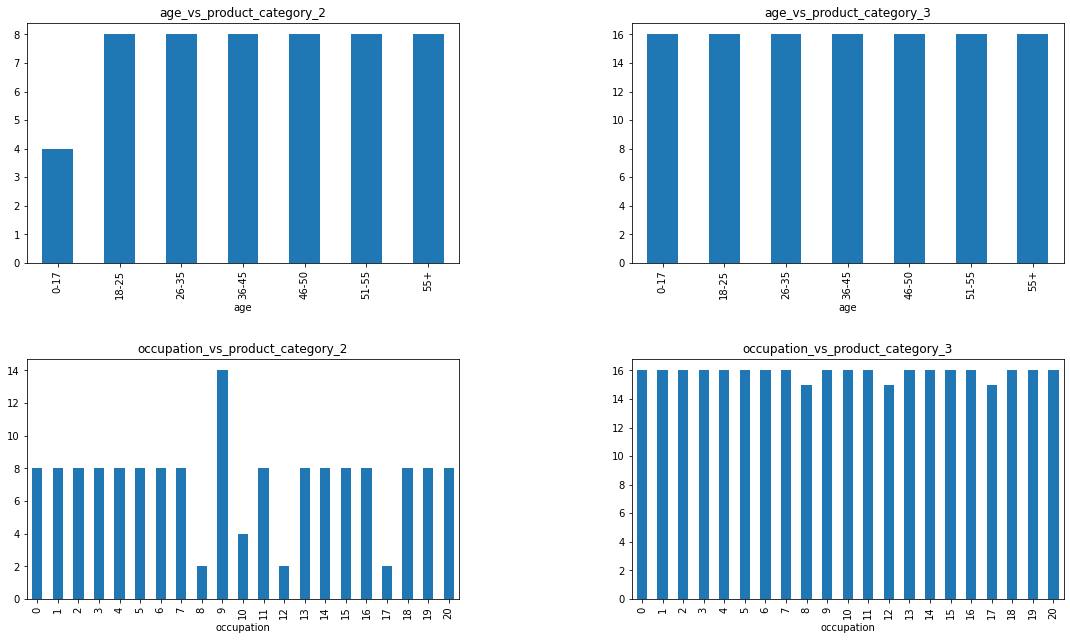

In [39]:
plt.figure(figsize=(18,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(2,2,1)
a.plot(kind='bar',title="age_vs_product_category_2")
plt.subplot(2,2,2)
b.plot(kind='bar',title="age_vs_product_category_3")
plt.subplot(2,2,3)
c.plot(kind='bar',title="occupation_vs_product_category_2")
plt.subplot(2,2,4)
d.plot(kind='bar',title="occupation_vs_product_category_3")
plt.show()


By comparing both 'age' and 'occupation' colums  the basis of occupation gtting more and differnt Product_categories which are mostly repeated.

In [40]:
def fill_nan_category(category_colunm):
    x=bfs.groupby('occupation')[category_colunm].agg(pd.Series.mode)
    for i,j in zip(x.index,x):
        bfs.loc[bfs['occupation']==i,category_colunm]=bfs.loc[bfs['occupation']==i,category_colunm].fillna(j)


In [41]:
def fill_nan_category(category_colunm):
    x=bfs.groupby('occupation')[category_colunm].agg(pd.Series.mode)
    for i,j in zip(x.index,x):
        bfs.loc[bfs['occupation']==i,category_colunm]=bfs.loc[bfs['occupation']==i,category_colunm].fillna(j)


In [43]:
data[['product_category_1','product_category_2','product_category_3']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   product_category_1  550068 non-null  int64  
 1   product_category_2  376430 non-null  float64
 2   product_category_3  166821 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 12.6 MB


In [45]:
data.head()


,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,NaN,NaN,7969


In [46]:
data.purchase.unique(),data.purchase.isnull().count()


(array([ 8370, 15200,  1422, ...,   135,   123,   613], dtype=int64), 550068)

In [48]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     550068 non-null  int64  
 1   product_id                  550068 non-null  object 
 2   gender                      550068 non-null  object 
 3   age                         550068 non-null  object 
 4   occupation                  550068 non-null  int64  
 5   city_category               550068 non-null  object 
 6   stay_in_current_city_years  550068 non-null  int32  
 7   marital_status              550068 non-null  int64  
 8   product_category_1          550068 non-null  int64  
 9   product_category_2          376430 non-null  float64
 10  product_category_3          166821 non-null  float64
 11  purchase                    550068 non-null  int64  
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 48.3+ MB


In [49]:
data.to_csv('./bfs_clean_data.csv')

cleaned the data successfully without losing single value, got total 550068 value

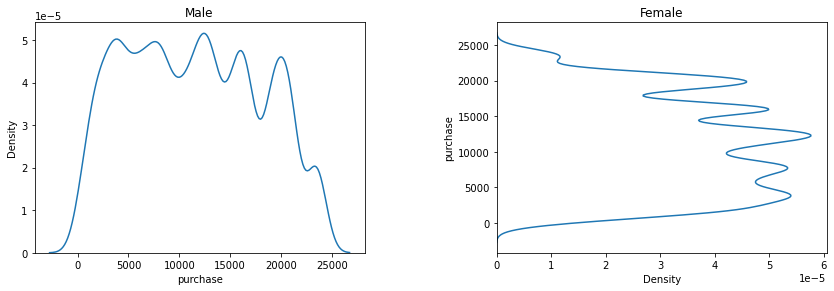

In [54]:
plt.figure(figsize=(10,4))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.2,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
ma=data[data['gender']=='M'].value_counts('purchase').reset_index()
fe=data[data['gender']=='F'].value_counts('purchase').to_frame()
plt.subplot(1,2,1)
sns.kdeplot(x='purchase',data=ma).set_title('Male')
plt.subplot(1,2,2)
sns.kdeplot(y='purchase',data=fe).set_title('Female')
plt.show()


<AxesSubplot:xlabel='gender', ylabel='purchase'>

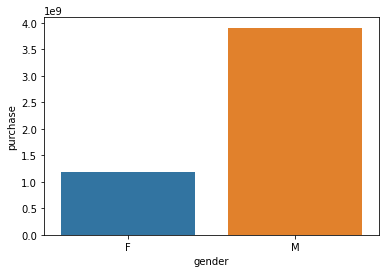

In [56]:
p=data.groupby('gender').agg({'purchase':sum}).reset_index()
sns.barplot(x='gender',y='purchase',data=p)


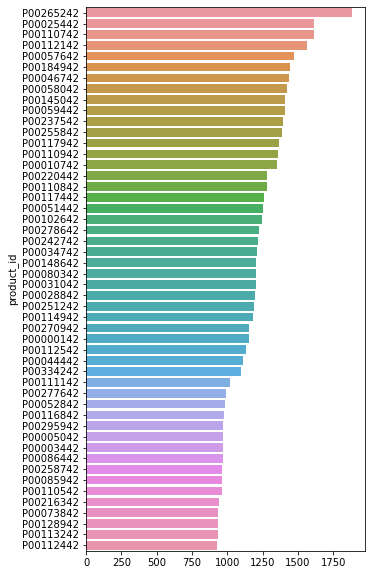

In [58]:
p_id=data.value_counts('product_id').sort_values(ascending=False).head(50)
plt.figure(figsize=(5,10))
sns.barplot(y=p_id.index,x=p_id)
plt.show()


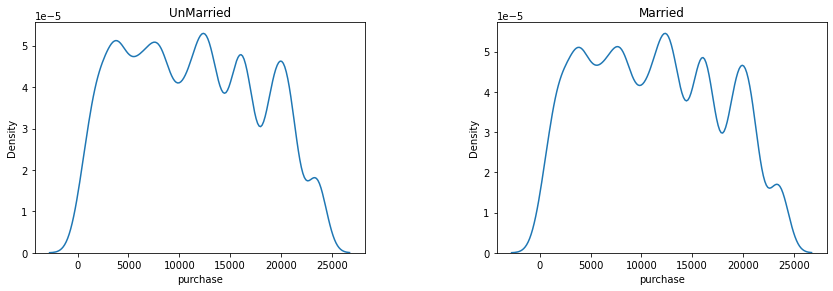

In [60]:
UM_P=data[data['marital_status']==0].value_counts('purchase').to_frame()
M_P=data[data['marital_status']==1].value_counts('purchase').to_frame()
plt.figure(figsize=(10,4))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.2,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(1,2,1)
sns.kdeplot(x='purchase',data=UM_P).set_title('UnMarried')
plt.subplot(1,2,2)
sns.kdeplot(x='purchase',data=M_P).set_title('Married')
plt.show()




Purchase Distribution of Married and UnMarried customers.


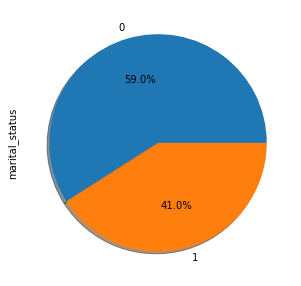

In [62]:
data.groupby('marital_status').agg({'marital_status':'count'}).marital_status.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()


,gender,marital_status,purchase
0,F,0,684154127
1,F,1,502078515
2,M,0,2324773320
3,M,1,1584806780


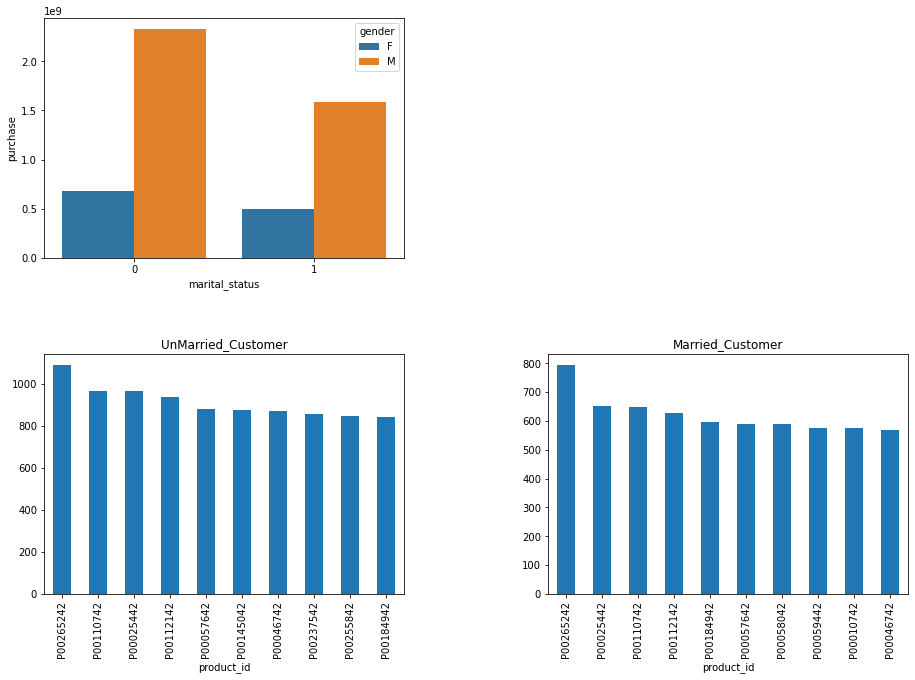

In [67]:
M_UM_P=data.groupby(['gender','marital_status']).agg({'purchase':sum}).reset_index()
UM=data[data['marital_status']==0].value_counts('product_id').nlargest(10)
M=data[data['marital_status']==1].value_counts('product_id').nlargest(10)
plt.subplots_adjust(left=1,
                    bottom=1,
                    right=3,
                    top=3,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(2,2,1)
sns.barplot(x='marital_status',y='purchase',hue='gender',data=M_UM_P)
plt.subplot(2,2,3)
UM.plot(x=UM.index,y=UM,kind='bar',title='UnMarried_Customer')
plt.subplot(2,2,4)
M.plot(x=M.index,y=M,kind='bar',title='Married_Customer')
M_UM_P


In the above plot the 'UnMarried' customers purchasing more than the 'Married' customers.

And BarPlot shows that the top 10 Product Id's purshased by them frequently.

